In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline


In [129]:
train= pd.read_csv('Train.csv')
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN,0


In [130]:
train.shape

(400000, 19)

In [4]:
about_data= pd.read_csv('VariableDefinitions.csv')
about_data

,Variable Definitions,Unnamed: 1,Unnamed: 2
0,NaN,French,English
1,NaN,Le dataset churn comprend 19 variables dont 15...,The churn dataset includes 19 variables includ...
2,user_id,NaN,NaN
3,REGION,la localité de chaque client,the location of each client
4,TENURE,la durée dans le reseau,duration in the network
5,MONTANT,montant de recharge,top-up amount
6,FREQUENCE_RECH,nombre de fois que le client a fait une recharge,number of times the customer refilled
7,REVENUE,revenu mensuel de chaque client,monthly income of each client
8,ARPU_SEGMENT,revenu sur 90 jours/3,income over 90 days / 3
9,FREQUENCE,nombre de fois que client à fait un revenu,number of times the client has made an income


In [131]:
train.isna().sum()/len(train) * 100

user_id            0.00000
REGION            39.38000
TENURE             0.00000
MONTANT           35.06925
FREQUENCE_RECH    35.06925
REVENUE           33.66575
ARPU_SEGMENT      33.66575
FREQUENCE         33.66575
DATA_VOLUME       49.21350
ON_NET            36.45475
ORANGE            41.57925
TIGO              59.84650
ZONE1             92.07750
ZONE2             93.62175
MRG                0.00000
REGULARITY         0.00000
TOP_PACK          41.83225
FREQ_TOP_PACK     41.83225
CHURN              0.00000
dtype: float64

In [132]:
#dropping missing values that are greater than 65%


def missing_values(df,percentage):
    columns = df.columns
    percentage_missing = df.isna().sum() * 100 / len(df)
    
    
    missing_values_df = pd.DataFrame({'column_name':columns,
                                     'percentage_missing': percentage_missing})
    
    missing_drop = list(missing_values_df[missing_values_df.percentage_missing > percentage].column_name)
    
    df= df.drop(missing_drop,axis=1,inplace=True)
    return df

In [133]:
missing_values(train,70)

In [134]:
train.dtypes

user_id            object
REGION             object
TENURE             object
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
MRG                object
REGULARITY          int64
TOP_PACK           object
FREQ_TOP_PACK     float64
CHURN               int64
dtype: object

In [135]:
train.drop('user_id',axis = 1, inplace = True)

In [136]:
train

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NO,62,All-net 500F=2000F;5d,35.0,0
1,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
3,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NO,50,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,TAMBACOUNDA,K > 24 month,700.0,2.0,704.0,235.0,3.0,NaN,12.0,14.0,NaN,NO,46,All-net 500F=2000F;5d,1.0,0
399996,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,14,NaN,NaN,0
399997,NaN,K > 24 month,700.0,2.0,699.0,233.0,5.0,237.0,1.0,NaN,NaN,NO,15,"Data: 100 F=40MB,24H",3.0,0
399998,NaN,K > 24 month,NaN,NaN,9.0,3.0,1.0,0.0,NaN,0.0,NaN,NO,5,NaN,NaN,1


In [137]:
train.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,CHURN
count,259723.000000,259723.000000,265337.000000,265337.000000,265337.000000,203146.000000,254181.000000,233683.000000,160614.000000,400000.000000,232671.000000,400000.00000
mean,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,28.046502,9.254209,0.18711
std,7099.640630,13.275514,7175.802367,2391.929290,14.679943,12281.867504,873.593034,204.733272,63.061871,22.282773,12.305563,0.39000
min,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,6.000000,2.000000,0.00000
50%,3000.000000,6.000000,3000.000000,1000.000000,9.000000,267.000000,27.000000,29.000000,6.000000,24.000000,5.000000,0.00000
75%,7300.000000,15.000000,7340.000000,2447.000000,19.000000,2925.000000,155.000000,99.000000,20.000000,51.000000,12.000000,0.00000
max,226550.000000,133.000000,233413.000000,77804.000000,91.000000,934576.000000,45011.000000,6788.000000,2758.000000,62.000000,629.000000,1.00000


In [138]:
train.TENURE.unique()

array(['K > 24 month', 'H 15-18 month', 'G 12-15 month', 'J 21-24 month',
       'I 18-21 month', 'E 6-9 month', 'F 9-12 month', 'D 3-6 month'],
      dtype=object)

In [139]:
train.TENURE.mode()

0    K > 24 month
dtype: object

In [140]:
train.REGION.unique()

array(['SAINT-LOUIS', nan, 'TAMBACOUNDA', 'FATICK', 'THIES', 'LOUGA',
       'DAKAR', 'KAFFRINE', 'DIOURBEL', 'KOLDA', 'MATAM', 'SEDHIOU',
       'KAOLACK', 'ZIGUINCHOR', 'KEDOUGOU'], dtype=object)

In [141]:
train.REGION.mode()

0    DAKAR
dtype: object

In [142]:
train.TOP_PACK.mode()

0    All-net 500F=2000F;5d
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f565fdbb850>,
      dtype=object)

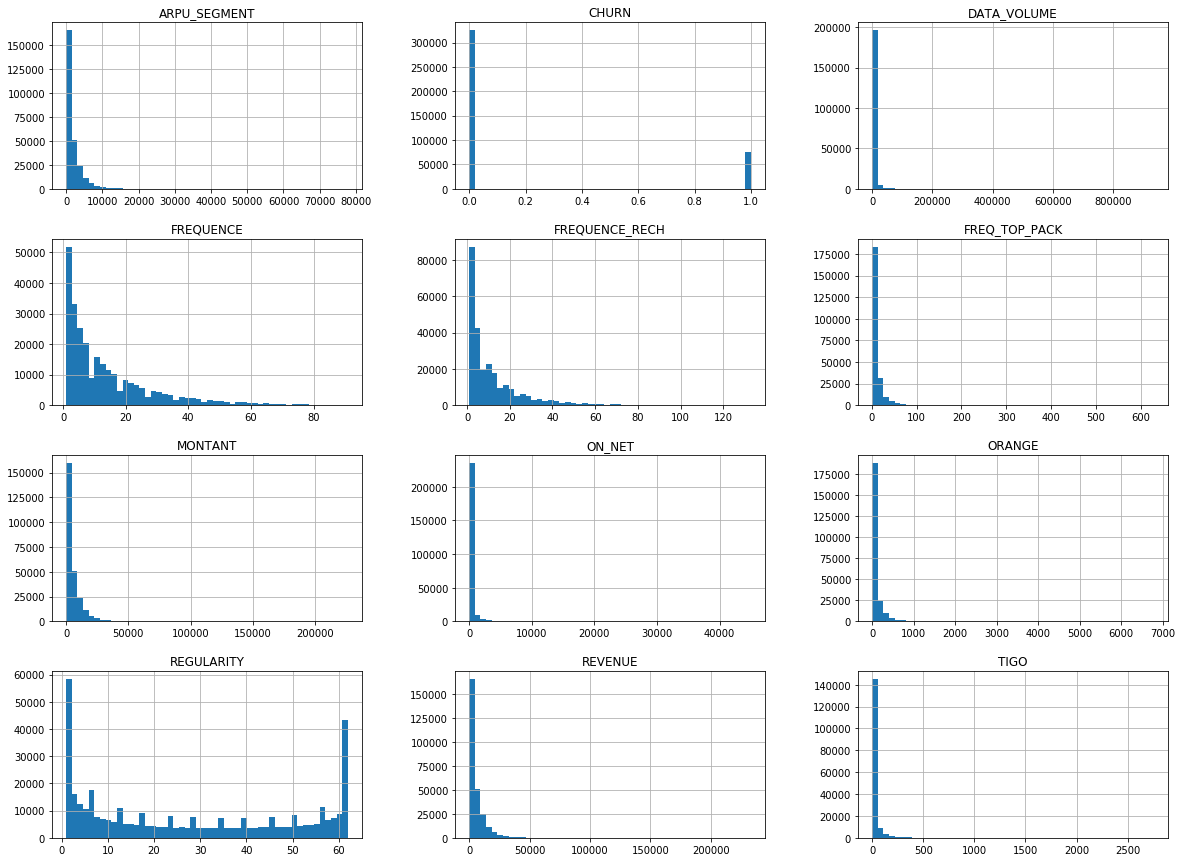

In [143]:
train.hist(bins=50,figsize=(20,15))

In [144]:
objects =[]

for i in train.columns:
    if train[i].dtypes == object and train[i].isna().sum() > 1:
        train.drop(i,axis=1)
        objects.append(i)

In [145]:
objects

['REGION', 'TOP_PACK']

In [146]:
train['REGION'].fillna(train['REGION'].mode()[0],inplace=True)


In [147]:
train.isna().sum()

REGION                 0
TENURE                 0
MONTANT           140277
FREQUENCE_RECH    140277
REVENUE           134663
ARPU_SEGMENT      134663
FREQUENCE         134663
DATA_VOLUME       196854
ON_NET            145819
ORANGE            166317
TIGO              239386
MRG                    0
REGULARITY             0
TOP_PACK          167329
FREQ_TOP_PACK     167329
CHURN                  0
dtype: int64

In [148]:
train['TOP_PACK'].fillna(train['TOP_PACK'].mode()[0],inplace=True)


In [149]:
from sklearn.impute import SimpleImputer

In [150]:
trains=train.copy()

In [151]:
objecte=[]

for i in trains.columns:
    if trains[i].dtypes == object:
        objecte.append(i)
        
objecte

['REGION', 'TENURE', 'MRG', 'TOP_PACK']

In [152]:


for i in trains.columns:
    if trains[i].dtypes == object:
   
        trains.drop(i,axis=1,inplace=True)
        


In [153]:
trains.dtypes

MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
REGULARITY          int64
FREQ_TOP_PACK     float64
CHURN               int64
dtype: object

In [154]:
imputer = SimpleImputer(strategy='median')

tr=imputer.fit_transform(trains)

In [155]:
trains= pd.DataFrame(tr,columns=trains.columns)

In [156]:
trains.isna().sum()

MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [157]:
for i in objecte:
    trains[i]=train[i]

In [158]:
trains

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,CHURN,REGION,TENURE,MRG,TOP_PACK
0,17000.0,32.0,18000.0,6000.0,34.0,267.0,97.0,355.0,6.0,62.0,35.0,0.0,SAINT-LOUIS,K > 24 month,NO,All-net 500F=2000F;5d
1,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,40.0,22.0,0.0,DAKAR,K > 24 month,NO,"Data: 100 F=40MB,24H"
2,1500.0,3.0,1500.0,500.0,3.0,267.0,30.0,30.0,6.0,32.0,3.0,0.0,TAMBACOUNDA,K > 24 month,NO,All-net 500F=2000F;5d
3,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,18.0,3.0,0.0,FATICK,K > 24 month,NO,On net 200F=Unlimited _call24H
4,3000.0,6.0,498.0,166.0,3.0,1.0,1.0,3.0,6.0,50.0,5.0,0.0,FATICK,K > 24 month,NO,All-net 500F=2000F;5d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,700.0,2.0,704.0,235.0,3.0,267.0,12.0,14.0,6.0,46.0,1.0,0.0,TAMBACOUNDA,K > 24 month,NO,All-net 500F=2000F;5d
399996,3000.0,6.0,3000.0,1000.0,9.0,267.0,27.0,29.0,6.0,14.0,5.0,0.0,DAKAR,K > 24 month,NO,All-net 500F=2000F;5d
399997,700.0,2.0,699.0,233.0,5.0,237.0,1.0,29.0,6.0,15.0,3.0,0.0,DAKAR,K > 24 month,NO,"Data: 100 F=40MB,24H"
399998,3000.0,6.0,9.0,3.0,1.0,0.0,27.0,0.0,6.0,5.0,5.0,1.0,DAKAR,K > 24 month,NO,All-net 500F=2000F;5d


In [159]:
trains.REGION.unique()

array(['SAINT-LOUIS', 'DAKAR', 'TAMBACOUNDA', 'FATICK', 'THIES', 'LOUGA',
       'KAFFRINE', 'DIOURBEL', 'KOLDA', 'MATAM', 'SEDHIOU', 'KAOLACK',
       'ZIGUINCHOR', 'KEDOUGOU'], dtype=object)

In [160]:
trains.TENURE.unique()

array(['K > 24 month', 'H 15-18 month', 'G 12-15 month', 'J 21-24 month',
       'I 18-21 month', 'E 6-9 month', 'F 9-12 month', 'D 3-6 month'],
      dtype=object)

In [161]:
trains.TOP_PACK.value_counts()

All-net 500F=2000F;5d             226004
On net 200F=Unlimited _call24H     28387
Data:490F=1GB,7d                   21661
Data: 100 F=40MB,24H               15590
Mixt 250F=Unlimited_call24H        12712
                                   ...  
pack_chinguitel_24h                    1
301765007                              1
APANews_monthly                        1
pilot_offer6                           1
pilot_offer5                           1
Name: TOP_PACK, Length: 111, dtype: int64

In [162]:
trains.corr()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,CHURN
MONTANT,1.000000,0.809741,0.974696,0.974696,0.787252,0.275878,0.356312,0.671581,0.437056,0.493203,0.744960,-0.145367
FREQUENCE_RECH,0.809741,1.000000,0.814495,0.814495,0.952994,0.180530,0.428944,0.542036,0.365711,0.533903,0.864312,-0.167949
REVENUE,0.974696,0.814495,1.000000,1.000000,0.799557,0.284731,0.359752,0.675722,0.436096,0.501339,0.756084,-0.148293
ARPU_SEGMENT,0.974696,0.814495,1.000000,1.000000,0.799556,0.284731,0.359752,0.675723,0.436096,0.501338,0.756083,-0.148293
FREQUENCE,0.787252,0.952994,0.799557,0.799556,1.000000,0.192952,0.415416,0.495838,0.331198,0.537958,0.835913,-0.156751
DATA_VOLUME,0.275878,0.180530,0.284731,0.284731,0.192952,1.000000,0.008356,0.058266,0.036566,0.203528,0.140644,-0.068747
ON_NET,0.356312,0.428944,0.359752,0.359752,0.415416,0.008356,1.000000,0.253257,0.168969,0.289740,0.380560,-0.103455
ORANGE,0.671581,0.542036,0.675722,0.675723,0.495838,0.058266,0.253257,1.000000,0.433029,0.329056,0.573671,-0.115524
TIGO,0.437056,0.365711,0.436096,0.436096,0.331198,0.036566,0.168969,0.433029,1.000000,0.215773,0.385078,-0.077468
REGULARITY,0.493203,0.533903,0.501339,0.501338,0.537958,0.203528,0.289740,0.329056,0.215773,1.000000,0.422553,-0.479120


In [163]:
(trains.CHURN.value_counts()/len(trains)) * 100

0.0    81.289
1.0    18.711
Name: CHURN, dtype: float64

In [165]:
trains

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,CHURN,REGION,TENURE,MRG,TOP_PACK
0,17000.0,32.0,18000.0,6000.0,34.0,267.0,97.0,355.0,6.0,62.0,35.0,0.0,SAINT-LOUIS,K > 24 month,NO,All-net 500F=2000F;5d
1,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,40.0,22.0,0.0,DAKAR,K > 24 month,NO,"Data: 100 F=40MB,24H"
2,1500.0,3.0,1500.0,500.0,3.0,267.0,30.0,30.0,6.0,32.0,3.0,0.0,TAMBACOUNDA,K > 24 month,NO,All-net 500F=2000F;5d
3,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,18.0,3.0,0.0,FATICK,K > 24 month,NO,On net 200F=Unlimited _call24H
4,3000.0,6.0,498.0,166.0,3.0,1.0,1.0,3.0,6.0,50.0,5.0,0.0,FATICK,K > 24 month,NO,All-net 500F=2000F;5d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,700.0,2.0,704.0,235.0,3.0,267.0,12.0,14.0,6.0,46.0,1.0,0.0,TAMBACOUNDA,K > 24 month,NO,All-net 500F=2000F;5d
399996,3000.0,6.0,3000.0,1000.0,9.0,267.0,27.0,29.0,6.0,14.0,5.0,0.0,DAKAR,K > 24 month,NO,All-net 500F=2000F;5d
399997,700.0,2.0,699.0,233.0,5.0,237.0,1.0,29.0,6.0,15.0,3.0,0.0,DAKAR,K > 24 month,NO,"Data: 100 F=40MB,24H"
399998,3000.0,6.0,9.0,3.0,1.0,0.0,27.0,0.0,6.0,5.0,5.0,1.0,DAKAR,K > 24 month,NO,All-net 500F=2000F;5d


In [167]:
trains.TENURE.value_counts()

K > 24 month     379439
I 18-21 month      8312
H 15-18 month      4858
G 12-15 month      2788
J 21-24 month      2325
F 9-12 month       1771
E 6-9 month         359
D 3-6 month         148
Name: TENURE, dtype: int64

In [ ]:
trains

In [168]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# trains['REGION'] = LabelEncoder().fit_transform(trains['REGION'])
# ogc = OneHotEncoder()

In [172]:
trains.drop(['MRG'], axis=1, inplace = True)

In [176]:
del(objecte[2])

In [177]:
objecte

['REGION', 'TENURE', 'TOP_PACK']

In [178]:
trains = pd.get_dummies(data=trains, columns=objecte)

In [179]:
trains

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,...,TOP_PACK_101,TOP_PACK_102,TOP_PACK_103,TOP_PACK_104,TOP_PACK_105,TOP_PACK_106,TOP_PACK_107,TOP_PACK_108,TOP_PACK_109,TOP_PACK_110
0,17000.0,32.0,18000.0,6000.0,34.0,267.0,97.0,355.0,6.0,62.0,...,0,0,0,0,0,0,0,0,0,0
1,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,40.0,...,0,0,0,0,0,0,0,0,0,0
2,1500.0,3.0,1500.0,500.0,3.0,267.0,30.0,30.0,6.0,32.0,...,0,0,0,0,0,0,0,0,0,0
3,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,18.0,...,0,0,0,0,0,0,0,0,0,0
4,3000.0,6.0,498.0,166.0,3.0,1.0,1.0,3.0,6.0,50.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,700.0,2.0,704.0,235.0,3.0,267.0,12.0,14.0,6.0,46.0,...,0,0,0,0,0,0,0,0,0,0
399996,3000.0,6.0,3000.0,1000.0,9.0,267.0,27.0,29.0,6.0,14.0,...,0,0,0,0,0,0,0,0,0,0
399997,700.0,2.0,699.0,233.0,5.0,237.0,1.0,29.0,6.0,15.0,...,0,0,0,0,0,0,0,0,0,0
399998,3000.0,6.0,9.0,3.0,1.0,0.0,27.0,0.0,6.0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
trains

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,...,TOP_PACK_101,TOP_PACK_102,TOP_PACK_103,TOP_PACK_104,TOP_PACK_105,TOP_PACK_106,TOP_PACK_107,TOP_PACK_108,TOP_PACK_109,TOP_PACK_110
0,17000.0,32.0,18000.0,6000.0,34.0,267.0,97.0,355.0,6.0,62.0,...,0,0,0,0,0,0,0,0,0,0
1,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,40.0,...,0,0,0,0,0,0,0,0,0,0
2,1500.0,3.0,1500.0,500.0,3.0,267.0,30.0,30.0,6.0,32.0,...,0,0,0,0,0,0,0,0,0,0
3,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,18.0,...,0,0,0,0,0,0,0,0,0,0
4,3000.0,6.0,498.0,166.0,3.0,1.0,1.0,3.0,6.0,50.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,700.0,2.0,704.0,235.0,3.0,267.0,12.0,14.0,6.0,46.0,...,0,0,0,0,0,0,0,0,0,0
399996,3000.0,6.0,3000.0,1000.0,9.0,267.0,27.0,29.0,6.0,14.0,...,0,0,0,0,0,0,0,0,0,0
399997,700.0,2.0,699.0,233.0,5.0,237.0,1.0,29.0,6.0,15.0,...,0,0,0,0,0,0,0,0,0,0
399998,3000.0,6.0,9.0,3.0,1.0,0.0,27.0,0.0,6.0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
trains.corr()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,...,TOP_PACK_101,TOP_PACK_102,TOP_PACK_103,TOP_PACK_104,TOP_PACK_105,TOP_PACK_106,TOP_PACK_107,TOP_PACK_108,TOP_PACK_109,TOP_PACK_110
MONTANT,1.000000,0.809741,0.974696,0.974696,0.787252,0.275878,0.356312,0.671581,0.437056,0.493203,...,-0.000916,-0.001323,0.024617,0.045751,0.041150,0.002585,0.006729,0.017718,-0.000578,-0.000849
FREQUENCE_RECH,0.809741,1.000000,0.814495,0.814495,0.952994,0.180530,0.428944,0.542036,0.365711,0.533903,...,-0.003361,-0.001468,-0.001436,-0.004204,-0.009679,0.015924,-0.008772,0.004942,-0.001087,-0.001087
REVENUE,0.974696,0.814495,1.000000,1.000000,0.799557,0.284731,0.359752,0.675722,0.436096,0.501339,...,-0.003144,-0.001186,0.023470,0.044146,0.048868,0.002948,0.008365,0.018143,-0.000587,-0.000971
ARPU_SEGMENT,0.974696,0.814495,1.000000,1.000000,0.799556,0.284731,0.359752,0.675723,0.436096,0.501338,...,-0.003144,-0.001186,0.023469,0.044146,0.048868,0.002947,0.008366,0.018143,-0.000586,-0.000971
FREQUENCE,0.787252,0.952994,0.799557,0.799556,1.000000,0.192952,0.415416,0.495838,0.331198,0.537958,...,-0.002298,-0.000141,-0.001796,-0.004968,-0.012016,0.018244,-0.008400,0.004505,-0.000297,-0.001465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TOP_PACK_106,0.002585,0.015924,0.002948,0.002947,0.018244,0.001287,0.017973,-0.001062,0.000540,0.013376,...,-0.000098,-0.000052,-0.000033,-0.000096,-0.000219,1.000000,-0.000203,-0.000023,-0.000023,-0.000023
TOP_PACK_107,0.006729,-0.008772,0.008365,0.008366,-0.008400,-0.000685,0.004864,0.010759,0.003289,0.008964,...,-0.000093,-0.000049,-0.000031,-0.000090,-0.000207,-0.000203,1.000000,-0.000022,-0.000022,-0.000022
TOP_PACK_108,0.017718,0.004942,0.018143,0.018143,0.004505,0.001717,-0.000367,0.000624,-0.000305,0.000706,...,-0.000011,-0.000006,-0.000004,-0.000010,-0.000024,-0.000023,-0.000022,1.000000,-0.000003,-0.000003
TOP_PACK_109,-0.000578,-0.001087,-0.000587,-0.000586,-0.000297,-0.000328,-0.000388,-0.000661,-0.000266,-0.001139,...,-0.000011,-0.000006,-0.000004,-0.000010,-0.000024,-0.000023,-0.000022,-0.000003,1.000000,-0.000003


In [182]:
# trains.drop(['MRG','TOP_PACK','TENURE'], axis=1, inplace = True)

In [183]:
from sklearn.model_selection import train_test_split


In [184]:
X = trains.drop(['CHURN'],axis = 1)
y = trains["CHURN"]

In [185]:
y.shape

(400000,)

In [186]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify= trains['CHURN'],test_size= .3)

In [187]:
y_test.shape

(120000,)

In [188]:
from sklearn.ensemble import RandomForestClassifier

rf_clf= RandomForestClassifier()

In [189]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [193]:
y_predict = rf_clf.predict_proba(X_test)

In [210]:
from sklearn.metrics import log_loss

log_loss(y_test,y_predict)



0.35081396469596204

# Searching for the best hyperprameter

In [211]:
n_estimators = [100, 300, 500, 700,900,1000]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)


In [212]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_rf = GridSearchCV(rf_clf,hyperF,cv=3,n_jobs=-1)

attempting to optimize the parameters for RandomforestClassifier


https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6

bestparams_

In [195]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 5, random_state = None)

### Sinppet of code is gotten from the vidhya analytics that was shared with me. 

https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/?utm_source=feed#


https://github.com/krishnaik06/Types-of-Crossvalidation/blob/master/Hyperparameter%20Optimization%20For%20Xgboost.ipynb

In [196]:
for train_index, test_index in skf.split(X,y):
    print(f'Train:{train_index}, \nvalidation: {test_index}')
    X_k_train, X_k_test = X.iloc[train_index],X.iloc[test_index]
    y_k_train, y_k_test = y.iloc[train_index], y.iloc[test_index]

Train:[ 80000  80001  80002 ... 399997 399998 399999], 
validation: [    0     1     2 ... 79997 79998 79999]
Train:[     0      1      2 ... 399997 399998 399999], 
validation: [ 80000  80001  80002 ... 160751 160757 160760]
Train:[     0      1      2 ... 399997 399998 399999], 
validation: [159815 159816 159819 ... 240103 240106 240108]
Train:[     0      1      2 ... 399997 399998 399999], 
validation: [239962 239963 239966 ... 320093 320094 320095]
Train:[     0      1      2 ... 320093 320094 320095], 
validation: [319628 319647 319652 ... 399997 399998 399999]


In [197]:
scores=[]
rf_clf.fit(X_k_train,y_k_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [198]:
from sklearn.model_selection import cross_val_predict


In [199]:
kfold_preds= cross_val_predict(rf_clf,X_k_test,y_k_test,cv=5)

In [201]:
log_loss(y_k_test,kfold_preds)

4.517718009266298

In [202]:
!pip install xgboost

     |████████████████████████████████| 127.6 MB 3.2 kB/s eta 0:00:01   |▍                               | 1.4 MB 260 kB/s eta 0:08:05     |█▋                              | 6.2 MB 144 kB/s eta 0:14:02     |█▋                              | 6.3 MB 144 kB/s eta 0:14:02     |███                             | 12.3 MB 219 kB/s eta 0:08:46     |█████                           | 20.2 MB 382 kB/s eta 0:04:41     |███████▉                        | 31.2 MB 881 kB/s eta 0:01:50     |███████▉                        | 31.4 MB 881 kB/s eta 0:01:50     |████████▉                       | 35.4 MB 626 kB/s eta 0:02:28     |██████████▎                     | 40.9 MB 767 kB/s eta 0:01:53     |██████████▋                     | 42.3 MB 983 kB/s eta 0:01:27     |████████████▎                   | 48.9 MB 313 kB/s eta 0:04:11     |█████████████▌                  | 53.9 MB 800 kB/s eta 0:01:33     |█████████████▊                  | 54.8 MB 1.1 MB/s eta 0:01:05     |██████████████▊                 | 58.7 MB 87 k

In [203]:
import xgboost as xgb

In [204]:
from xgboost import XGBClassifier